<p><img src="../IMAGES/Logo-UFCG.png" width="80" ></p>

# Introdução à Astrofísica e Cosmologia

## Aula 04: Estrelas e sua Evolução

**Luciano Barosi**

## Inicialização

In [1]:
# Incluindo diretório scripts no caminho
from glob import glob
import sys
import os
sys.path.insert(0, '../scripts/')

In [2]:
# show result from all calculations of the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Astropy tem muitas funções úteis, aqui iniciamos 
#valores de constantes e a habilidade de fazer manipulações com unidades
from astropy import constants as const
from astropy import units as u
from astropy.io import fits
from astropy.modeling.models import BlackBody

In [4]:
# pacotes básicos
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
import seaborn as sns

In [5]:
# Pacote para algumas manipulações simbólicas.
# Para a visualização das expressões teremos que usar o display
from sympy import *
from sympy import init_printing; 
init_printing(use_latex='mathjax')
#from IPython.display import display
from sympy import init_session
init_session()

IPython console for SymPy 1.5.1 (Python 3.7.7-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.5.1/



In [6]:
# Pacote para transformar comprimento de onda em RGB
try:
    import wave2rgb as wv2rgb
except ImportError as error:
    print("wave2rgb não esta disponível")

In [7]:
# Plot magic
%matplotlib inline

In [8]:
# Instruções para usar o artroquery com a base de dados do ESO
#from astroquery.eso import Eso
#eso = Eso()
#eso.login("lbarosi", store_password=True)
#eso.list_instruments()
#eso.query_instrument('isaac', help=True)
#table = eso.query_instrument('isaac', column_filters={"dp_tech":"SPECTRUM"})
#eso.get_headers(table['DP.ID'])
#data_files = eso.retrieve_data(table['DP.ID'][:2])

## Introdução

Queremos construir um entendimento sobre as estrelas. ara tanto vamos iniciar considerando as nossas hipóteses para construir o modelo:

- **Estrelas** são consideradas **isoladas no espaço**, de forma que sua estrutura e evolução dependem apenas de suas características intrínsecas.
- Estrelas tem uma **composição homogênea**, em primeira aproximação.
- A autogravidade produz objetos **esfericamente simétricos**.

## Equilíbrio Hidrostático.

A rigor, qualquer sistema em evolução não pode estar em equilíbrio, mas as alterações nas estrelas acontecem numa escala de tempo muito grande comparada com os diversos fenômenos físicos encarregados de sua estruturura. Este é um equílibrio local. 

Por ora, vamos nos concentrar na estrela como um objeto em equilíbrio. Dada uma densidade $rho(r)$, sua massa é dada por:
$$ M(r) = 4\pi \int_0^r r^2 \rho(r)\mathrm{d}r,$$ que pode ser escrito na forma diferencial como:
$$\frac{dM(r)}{dr} = 4 \pi r^2 \rho(r). $$
A equação acima é uma equação de continuidade, apesar de sua aparência simplória ela será fundamental para compreendermos o equilíbrio estelar. (Em binários que trocam massa esta condição deixa de ser válida).

O campo gravitacional criado por uma massa esfericamente simétrica em uma superfície de raio $r$ é dado diretamente pela Lei da Gravitação Universal (com o uso da Lei de Gauss). Escrevemos a aceleração da gravidade como:

$$g(r) = -\frac{G M(r)}{r^2}. $$

O equilíbrio estelar demanda que a força gravitacional seja balanceada por alguma pressão da estrela, atuando no sentido centrífugo. Ao considerarmos um elemento de massa $dM$ localizado no raio $r$, podemos escrever a lei de newton como:

$$ dF = dS P - (P+dP)dS = -dS dP = dM a(r) = (\rho(r) dS dr) a(r), $$

se estamos no equilíbrio esta aceleração deve ser balanceada pela força gravitacional, de forma que assumimos que a força externa em casa elemento de massa seja nulo e o sistema esteja em equilíbrio.

Portanto, chegamos na condição de equilíbrio hidrostático:

$$\frac{d P(r)}{dr} = -\frac{G M(r) \rho(r)}{r^2}$$    

Para prosseguir é necessário uma equação de estado para a estrela, que indique a relação entre a Pressão e a Densidade.

Vamos considerar neste momento que a estrela seja bem aproximada por um gás ideal. Neste caso
$$P = n k T, $$
onde $n = N/V$ é a densidade de número de partículas. Podemos escrever esta grandeza utilizando a densidade e o peso molecular médio escrito em unidades de massa atômica:
$$n = \frac{\rho}{\mu m_p}, $$
onde $m_p$ é a massa do nucleon.

A composição das estrelas é majoritariamente de hidrogênio, alguma parcela de Hélio e traços de outros elementos que, em astronomia, são coletivamente chamados de **metais**

A densidade total da estrela é a soma das densidades de Hidrogênio, Hélio e metais. Frequentemente essas proporçṍes são expressas como a fração de massa de hidrogênio, a fração de massa do Hélio e a fração de massa de metais, definidas como **X**, **Y** e **Z**.

A massa molecular média $\mu$ depende tanto das frações de massa como dos estados de ionização de cada componente.

Para o hidrogênio neutro, $\mu = 1$ e a densidade de número é dada por $\rho/m_p$. Se o hidrogênio estiver ionizado, então temos o dobro de partículas, porque é o número delas que é relevante na equação de estado, de forma que a $\mu = 1/2$.

Se considerarmos um sistema puro de hélio, poderemos fazer o mesmo raciocínio. Para o Hélio neutro temos $\rho/4m_p$. Se o atómo de hélio estiver totalmente ionizado teremos 3 partículas correspondentes para cada átomo original e teremos $\mu = 4/3$

Para o caso dos metais neutros, teremos $\mu = A$ onde $A$ é o número de massa. COnsideremos que o número de prótons e neutros seja igual, o que é aproximadamente verdade para a maioria dos núcleos estáveis. Neste caso existem $A/2$ elétrons liberados no caso de ionização total, se $A/2 >> 1$ então temos que $\mu = 2$#.

Para uma mistura de gases totalmente ionizados teremos:
$$ n\approx \left(2X + \frac{3}{4}Y + \frac{1}{2}Z \right) \frac{\rho}{m_p}$$

Para uma composição neutra a expressão acima fica:
$$ n_{\mathrm{neutro}}\approx \left(X + \frac{1}{4}Y + \frac{Z}{A} \right) \frac{\rho}{m_p}$$

Vamos analisar o nosso próprio Sol:

In [9]:
# Massa do Sol
const.M_sun
const.R_sun
X = 0.734
Y = 0.250
Z = 0.016
muIon = 1/(2*X+3*Y/4+Z/2)
muN = 1/(X+Y/4)
g = const.G * const.M_sun/const.R_sun**2
print("Massa Molecular Média do Sol - totalmente ionizado:{:+.2f} ".format(muIon))
print("Massa Molecular Média do Sol - neutro:{:+.2f} ".format(muN))
print("Aceleração de gravidade superficial do Sol:{:+.2f} ".format(g))

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.988409870698051e+30 uncertainty=4.468805426856864e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2018'>

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar radius' value=695700000.0 uncertainty=0.0 unit='m' reference='IAU 2015 Resolution B 3'>

Massa Molecular Média do Sol - totalmente ionizado:+0.60 
Massa Molecular Média do Sol - neutro:+1.26 
Aceleração de gravidade superficial do Sol:+274.20 m / s2 


Podemos escrever a densidade como função da pressão para o gás ideal:

$$\rho = \frac{\mu m_p}{k T}P,$$ substituindo na equação de equilíbrio eletrostático temos:

$$\frac{dP}{dr} = -\frac{g \mu m_p}{kT}P $$

Se considerarmos uma situação em que $g$, $\mu$ e %T% sejam constantes, podemos resolver a equação para uma atmosfera isotérmica obtendo:

$$P \propto e^{-\frac{r}{H}}, $$

ou seja, vemos o aparecimento de uma grandeza $H$ que é uma escala de altura que podemos associar a altura da altmosfera do Sol.

In [10]:
Tsol = 5800*u.K
H = const.k_B* Tsol/(g*muIon*const.m_p)
print("Altura da Atmosfera Solar H = :{:+.0f} ".format(H.to(u.km)))

Altura da Atmosfera Solar H = :+290 km 


In [11]:
print("Razão  H/R = :{:+.5f} ".format(H.to(u.m)/const.R_sun))

Razão  H/R = :+0.00042 


Vemos que a escala é muito pequena quado comparada com o raio do Sol, o que permite justificar as aproximações realizadas.

## Classificação Espectral

Praticamente tudo o que sabemos sobre as estrelas vem da observação de sua luz. Nesta sessão vamos mostrar como a observação atenta do espectro estelar permitiu não apenas informações sobre a sua composição química como sobre a sua estrutura como um todo, incluindo a validação de um modelo de dinâmica e evolução estelar.

É importante lembrar que a observação do espectro da luz visível foi estudado por Newton e seus estudos foram se aprimorando até contrária-lo totalmente e revelar a natureza onsulatória da luz, por meio do que podemos entender a dispersão da luz em um prisma.

As observações de Kirchoff er Franhoffer mostraram que a luz tinha um espetro com estrutura bastante complicada. O estudo desta estrutura foi um importante caminho pelo qual Bohr construir o seu modelo atômico, iniciando o período conhecido como a mecânica quântica velha.

Infelizmente as cores digitais, em formato RGB não representam bem as cores reais que vemos na natureza. Se quisermos plotar um gráfico com cores razoavelmente realistas precisamos de alguma função que cuide disto. O pacote wavelength2RGB faz isto por nós. A informação que ele retorna esta no formato RGB. Para criarmos mapas de cor precisamos também da informação de transparência, ou *alpha-channel*, vamos utilizar o padrão RGBA, que precisa apresentar as cores como tuplas de números de 0 a 1.

Um espectro contínuo como o visto em um prisma ou no arco-iris parece com a figura abaixo.

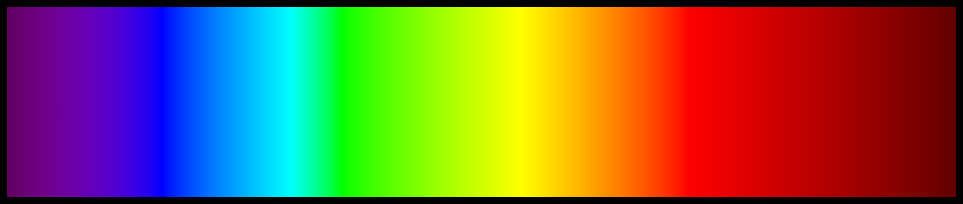

In [12]:
# Espectro visível
RED = 750
VIOLET = 380
visivel = np.arange(VIOLET, RED, 1)

# Criando novo mapa de cor
mapCor = np.ones((RED-VIOLET,4))
for wl in range(VIOLET, RED):
    r, g, b = wv2rgb.wavelength_to_rgb(wl)
    mapCor[wl-380, 0] = r/255
    mapCor[wl-380, 1] = g/255
    mapCor[wl-380, 2] = b/255
    mapCor[wl-380, 3] = 1
novoCM = ListedColormap(mapCor)
cmap = novoCM
# Imagem com fundo preto
fig, ax = plt.subplots(1, figsize=(17, 4))
colors = cmap(np.arange(cmap.N));
ax.imshow([colors], extent=[0, 10, 0, 2])
ax.set_axis_off()
fig.set_facecolor("black")
plt.show();

Olhando espectros com detaçhe podemos ver linhas de emissão, que aparecem mais brilhantes e linhas de absorção, que aparecem mais escuras. Em geral a linha de absorção indica a composição da fotosfera da estrela, enquanto as linhas de emissão indicam a composição química da cromosfera.

Podemos acessar dados de espectros de estrelas. Um lugar onde eles estão classificados por tipos de estrelas é na página do experimento [isaac](https://www.eso.org/sci/facilities/paranal/decommissioned/isaac/tools/lib.html) do European Southernn Observatory (ESO).

Os arquivos estão guardados em arquivos do tipo **FITS** que podem ser acessados com o astropy. A variável ```data``` abaixo é um numpy array com os dados simplesmente, e pode ser manipulado como quisermos.

In [13]:
# Arquivo exemplo de espectro estelar.
ex_Spectrum = "../DATA/SPECTRA/ukg5ii.fits"
# Podemos Abrir?
try:
    hdul = fits.open(ex_Spectrum)
except OSError:
    print("O arquivo não foi encontrado: {}".format(ex_Spectrum))
# Extraindo Informações do FITS          
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
size = data.shape[0] # aqui estão os dados  

# Faixa de comprimentos de onda no arquivo utilizado. (ESO/isaap)
lambda_min = 115
lambda_max = 2500
lambda_range = np.linspace(lambda_min, lambda_max, size)

Filename: ../DATA/SPECTRA/ukg5ii.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (4771,)   float32   


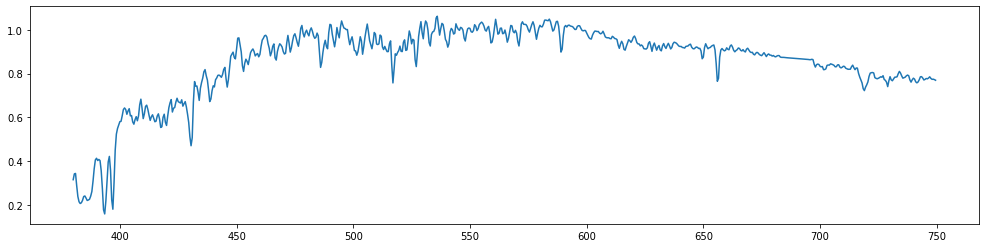

In [14]:
# Índices para cortar espectros na faixa visível
ii = np.where(lambda_range == VIOLET)[0][0]
ff= np.where(lambda_range == RED)[0][0]
# Plot preliminar
fig, ax = plt.subplots(1, figsize=(17, 4))
ax.plot(lambda_range[ii:ff], data[ii:ff])
plt.show();

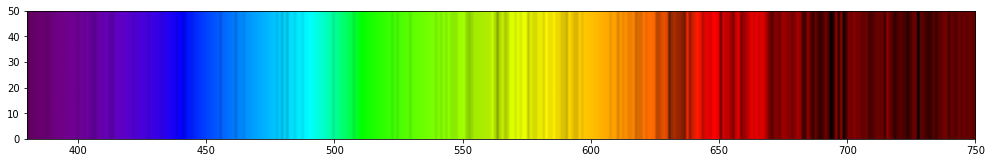

In [15]:
# Resample do espectro em bins de 1nm
# Criar colormap com faixa visível do espectro e com alpha channel controlado 
# pela intensidade do fluxo no bin espectral correspondente.
bins = RED-VIOLET
mapG52 = mapCor
dadosBinned = np.histogram(data[ii:ff], bins = bins, density = True)
alfa = dadosBinned[0]
mapG52[:, -1] = 1-alfa/alfa.max()
G52cmap = ListedColormap(mapG52)
fig, ax = plt.subplots(1, figsize=(17, 4))
coresG52 = cmap(np.arange(G52cmap.N));
ax.set_facecolor("black")
ax.imshow([mapG52], extent=[VIOLET, RED, 0, 50])
ax.set_ylabel("")
plt.show();

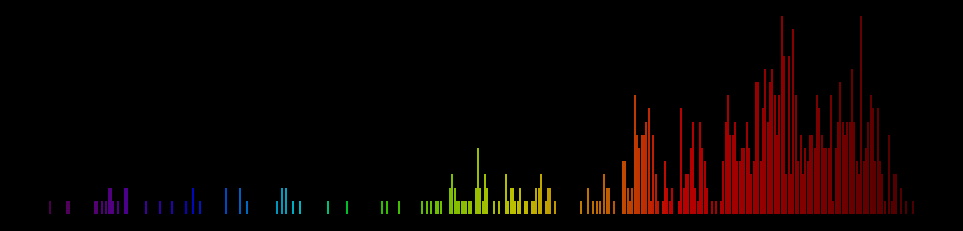

In [16]:
# Apenas para ilustração rápida, o espectro estelar binado com alturas
# correspondentes ao fluxo e cores relacionadas ao comprimento de onda.
fig, ax = plt.subplots(1, figsize=(17, 4))
plt.vlines(visivel, 0, dadosBinned[0], colors = coresG52)
ax.set_axis_off()
fig.set_facecolor("black")
plt.show();

### Átomo de Bohr e as séries espectrais

Podemos pensar no átomo de Bohr como a quantização do momento angular orbital so elétron.
$$L \equiv m r v = n \hbar, $$
O elétron está sujeito a forçca elétrica do próton, esta força é radial e portanto a energia é conservada:
$$ E \equiv K + U = \frac{1}{2}m v^2 - \frac{1}{4\pi \epsilon_0} \frac{e^2}{r},$$

A Lei de Newton para o elétron ainda nos informa que $v^2 = \frac{1}{m}\frac{1}{4\pi \epsilon_0} \frac{e^2}{r} $, logo
$$ E = - \frac{1}{2} \frac{1}{4\pi \epsilon_0} \frac{e^2}{r}, $$

utilizando agora a informação do momento angular:
$$ v^2 = \frac{1}{m}\frac{1}{4\pi \epsilon_0} \frac{e^2}{r}
$$
$$ v^2 = \frac{v}{4\pi \epsilon_0} \frac{e^2}{n\hbar}$$
$$ v = \frac{1}{4\pi \epsilon_0} \frac{e^2}{n\hbar}$$,
já vimos que a energia cinética é metade da energia total:

$$E = -\frac{1}{2}m (\frac{1}{4\pi \epsilon_0} \frac{e^2}{n\hbar})^2 $$
$$ E = - \frac{m e^4}{8 h^2 {\epsilon_0}^2 } \frac{1}{n^2} $$

In [17]:
# Massa do Sol
const.m_e
# Carga do elétron
const.e
# Constante de Planck
const.h 
# Conntante dielétrica do Vácuo
const.eps0
# Energia de Bohr
EE0 = const.m_e* (const.e.si)**4 /(8 * const.h**2 * const.eps0**2 )
print("Energia do Nível Fundamental {:-.2f}".format(EE0.to(u.eV)))

<<class 'astropy.constants.codata2018.CODATA2018'> name='Electron mass' value=9.1093837015e-31 uncertainty=2.8e-40 unit='kg' reference='CODATA 2018'>

<<class 'astropy.constants.codata2018.EMCODATA2018'> name='Electron charge' value=1.602176634e-19 uncertainty=0.0 unit='C' reference='CODATA 2018'>

<<class 'astropy.constants.codata2018.CODATA2018'> name='Planck constant' value=6.62607015e-34 uncertainty=0.0 unit='J s' reference='CODATA 2018'>

<<class 'astropy.constants.codata2018.EMCODATA2018'> name='Vacuum electric permittivity' value=8.8541878128e-12 uncertainty=1.3e-21 unit='F / m' reference='CODATA 2018'>

Energia do Nível Fundamental 13.61 eV


Vizualizando os níveis de evergia:

/home/lbarosi/miniconda3/envs/cursos/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


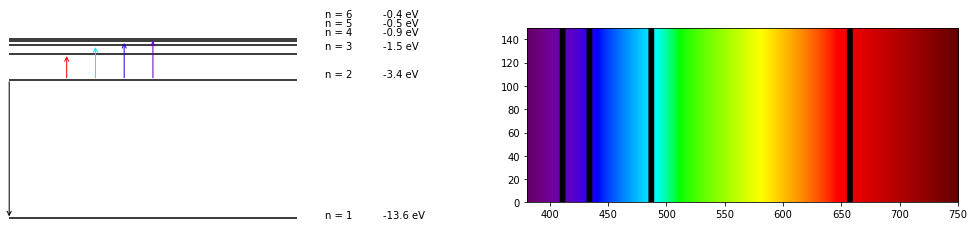

In [18]:
niveis = np.arange(6)
def energia(n):
    EE = - EE0/(n+1)**2
    return EE.to(u.eV)

# Define comprimento de onda associado a cada transição de energia a partir do nível n=2
# Série de Balmer
dataBalmer = mapCor
dataBalmer[:,3] = 1
tmp = ((energia(niveis).to(u.eV)-energia(1).to(u.eV))/(const.h*const.c))
lamb = np.floor((1/tmp[tmp !=0]).to(u.nm).value).astype(int)[1:]
lamb = np.concatenate([lamb, lamb+1, lamb+2, lamb-1, lamb-2]) # para visibilidade
for x in lamb:
    dataBalmer[x-380,3] = 0 #absorção
# Diagrama de níveis e espectro
fig, ax = plt.subplots(ncols = 2, figsize=(17, 4))
# Níveis de Energia
ax[0].hlines(energia(niveis), 0, 10)
for n in niveis:
    lambL = (const.h*const.c/(energia(n).to(u.eV)-energia(1).to(u.eV))).to(u.nm).value
    r, g, b = wv2rgb.wavelength_to_rgb(lambL)
    cores = (r/255, g/255, b/255, 1)
    # linhas $n = 1$
    ax[0].annotate("n = {}".format(n+1),
            xy=(11, energia(n).value-0.6/energia(n).value) )
    # Valores de energia
    ax[0].annotate("{:.1f}".format(energia(n)),
            xy=(13, energia(n).value-0.6/energia(n).value) )
    # Setas de transições
    ax[0].annotate("",
            xy=(n, energia(n).value), xycoords='data',
            xytext=(n, energia(1).value), textcoords='data',
            arrowprops=dict(color=cores, arrowstyle="->",
                            connectionstyle="arc3"),
            )
ax[0].set_xlim(0,15)
ax[0].set_ylim(-14, 2)
ax[0].set_axis_off()
# Espectro
ax[1].imshow([dataBalmer], extent=[VIOLET, RED, 0, 150])
# Deixe o fundo do espectro em preto.
ax[1].set_facecolor("black")
plt.show();

Para que vejamos as linhas do espectro de Balmer, precisamos de átomos de hidrogênio neutros e excitados. O efeito da temperatura afeta tant a ionização como a ionização de uma maneira delicada. Embora possamos imaginar que as temperaturas no interior das estrelas sejam suficientes para ionizar todos os átomos, isto não deve ser verdade na fotosfera e devemos encontrar um regime de ionização parcial.

Para determinar a fração de ionização como função da temperatura precisamos considerar com cuidado a população.

Consideremos o processo de ionização do hidrogênio:

$$ H + \gamma \longrightarrow p^+ + e^-$$

Consideramos o limite em que a Temperatura é muito menor do que a massa, de forma que podemos utilizar a aproximação de maxwell-boltzmann. Neste caso, a abundância do equilíbrio para cada sespécie é dada por:

$$f(\mu,T) = e^{-\frac{m-\mu}{kT}}e^{-\frac{p^2}{2kT}}, $$

A densidade de número pode ser obtida fazendo a integral:

$$n = g\int \frac{d^3 p}{(2\pi \hbar)^3}f = \frac{g}{2\pi^2 \hbar^3}  e^{-\frac{m-\mu}{kT}} \int dp  p^2 e^{-\frac{p^2}{kT}}$$





Podemos utilizar as informações acima com o pacote **sympy** de computação simbólica. Definimos a distribuição de boltzmann e a densidade de número e efetumos a integral.

In [19]:
# Definindo todos os símbolos necessários
# É importante descrever as propriedades também
# para conseguir simplificar
x, p, g, h, m, mu, k, T = symbols('x p g h m mu k T')
f, n = symbols('f n ', cls=Function)
k = Symbol('k', real=True, positive=True)
T = Symbol('T', real=True, positive=True)
B = Symbol("B", real = True, positive = True)
ne = Symbol("n_e", real = True, positive = True)
npp = Symbol("n^{+}", real = True, positive = True)
nH = Symbol("n^0", real = True, positive = True)
me = Symbol("m_e", real = True, positive = True)
mp = Symbol("m_p", real = True, positive = True)
mH = Symbol("m_H", real = True, positive = True)
mue = Symbol("\mu_e", real = True, positive = True)
mup = Symbol("\mu_p", real = True, positive = True)
muH = Symbol("\mu_H", real = True, positive = True)

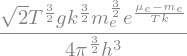

In [20]:
# Função de distribuição de Maxwell Boltzmann
def f(mu, m,g,p):
    return (g)*exp((-m+mu)/(k*T))*exp(-p**2/(2*m*k*T))
f(mu,m,g,p)
# Densidade de número é integrada no volume e cada célula de volume tem uma normalização 2\pi \hbar
def n(mu, m, g):
    return integrate((1/(2*pi*h)**3)*4*pi*p**2 * f(mu, m,g,p) , (p, 0, oo))
n(mue,me,g)

Vamos agora considerar uma combinação particular das densidades de número de Hidrogênio neutro, ionizado e elétrons. Usando o fato de que as partículas estão em equilíbrio térmico, as temperaturas são iguais, usando o equilíbrio químico, o potencial químico de ambos os lados deve ser o mesmo. Finalmente, a diferença de massa entre o átomo de hidrogênio neutro e o conjunto eletron mais próton é a energia de ligação do elétron no estado fundamental.

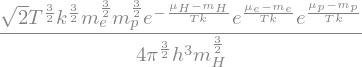

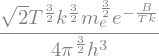

In [21]:
# Equilíbrio químico
subs1 = mup+mue
# Conservação de Energia
subs2 = -B + mp + me
# Massa dos núcleons
subs3 = mp
# SAHA. Precisa de um pouco de malabarismo para cancelar as massas
# Porque as aproximações no expoente e no termo multiplicativo
# são diferentes
n(mue, me, 2) * n(mup, mp, 2) / n(muH, mH, 4)
SAHAsym = (simplify( (n(mue, me, 2) * n(mup, mp, 2) / n(muH, mH, 4))\
                    .subs(muH,subs1)\
                    .subs(mH, mp)\
                    .subs(me,B)) \
                    * me**(Rational(3/2)) / B**(3/2))
SAHAsym

Podemos escrever a expressão acima em termos da fração ionizada, ou seja o número de íos de Hidrogênio dividido pelo total (Hidrogênio + Ion). Esta fração é a mesma da fração eletrônica devido a conservação de carga. $\chi_e$

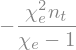

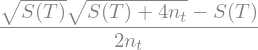

In [22]:
# Densidade de número total
nt = Symbol("n_{t}", real = True, positive = True)
# Fração Ionizada
xe = Symbol("\chi_e", real = True, positive = True)
# Lado direito da equação de SAHA
val = Symbol("S(T)", real = True, positive = True)
npp = nt*xe
ne = npp
nH = nt - npp
cancel(ne*npp/(nH))
eq1 = Eq(cancel(ne*npp/(nH)),val)
sols = solve(eq1, xe)
# Fração Ionizada
sols[0]

A equação de SAHA acima envolve grandezas de diferentes escalas e tem um comportamento de variação muito rápida, assim, é necessário um pouco de cuidado para fazer os gráficos e manter a precisão numérica.

Note ainda que conseguimos expressar a fração ionizada em termos da **temperatura** e da **densidade total**. Algumas vezes é útil escrever esta expressão usando a **pressão** e não a densidade. O que fica como um exercício.

Vamos agora voltar a utilizar o python e a biblioteca numpy, obtendo o valor das constantes físicas no astyropy.

In [23]:
# Este é o lado esquerdo da equação de SAHA
def fracIon(T):
    constFactor = ((np.sqrt(2*np.pi*const.m_e*const.k_B)/const.h)**3).value
    kb = const.k_B.to(u.eV/u.K).value
    B = -energia(0).value
    val = constFactor * T**(3/2) * np.exp(-B/(kb*T))
    return val
# Resolvendo para a fração ionizada
def fracTotal(T,n):
    SS = fracIon(T)/n
    val = (SS/2.)*(np.sqrt(1.+4./SS)-1.)
    return val

O nosso objetivo é analisar as transições de energia que geram linhas de Balmer. Para isso precisamos de átomos neutros e no nível II de energia. Como os estados do átomo de hidrogênio são confinados, a relação entre as densidades de número de átomos neutros no nível I e no nível II satisfazem uma regra simples dada pelo fator de Boltzmann

$$ \frac{n_0^{II}}{n_0^I} = e^{-\frac{E_2-E_1}{kT}},$$

como a soma dos dois números é o númer de átomos neutros, podemos escrevfer esta expressão em termos do número total e definimos a fração total de átomos do nível 2: 
$$\chi^{II} = \frac{(1-\chi_e)e^{-\frac{E_2-E_1}{kT}}}{1+ e^{-\frac{E_2-E_1}{kT}}} $$


### Exercício: 
Por que não consideramos os outros níveis de energia?

In [24]:
def frac2(T, d):
    kb = const.k_B.to(u.eV/u.K).value
    delta = (energia(1)-energia(0)).value
    y = np.exp(-delta/(kb*T))
    xe = fracTotal(T,d)
    val = (1-xe)*y/(1+y)
    return val

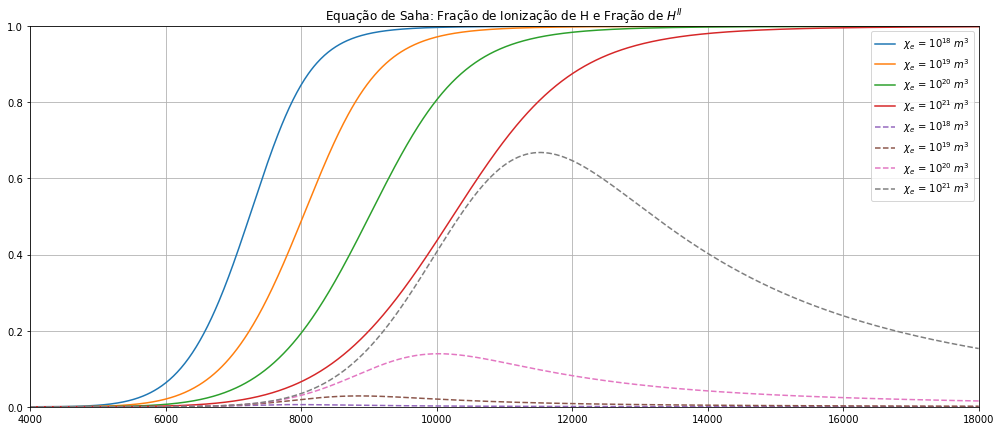

In [25]:
tt = np.linspace(4000,18000,1000)
densidades = np.power(10, np.arange(18, 22, 1), dtype=np.float64)
fig, ax = plt.subplots(1, figsize=(17, 7))
dadosIon = np.asarray([fracTotal(tt,x) for x in densidades]).T
dadosExc = np.asarray([100000.*frac2(tt,x) for x in densidades]).T
ax.set_title(r"Equação de Saha: Fração de Ionização de H e Fração de $H^{II}$")
[ax.plot(tt, dadosIon[:,i], 
         label = r"$\chi_e$ = $10^{{{}}} \;m^3$".format(np.log10(densidades[i]).astype("int")))\
         for i in [0,1,2,3]]
[ax.plot(tt, dadosExc[:,i], 
         label = r"$\chi_e$ = $10^{{{}}} \;m^3$".format(np.log10(densidades[i]).astype("int")),
         linestyle = "dashed") \
         for i in [0,1,2,3]]
ax.set_ylim(0, 1)
ax.set_xlim(4000, 18000)
ax.set_label(r"$T(K)$")
ax.set_label(r"$\chi$")
plt.grid()
plt.legend()
plt.show();

A **temperatura** aumentando colabora com o aumento da fração ionizada e acaba diminuindo a fração no nível II. Ambas as frações são bastante sensíveis a densidade de número.

## Espectros Estelares

In [26]:
# os.path.join is a platform-independent way to join two directories
working_dir_path = os.getcwd()
globpath = os.path.join(working_dir_path, '../DATA/SPECTRA/*.fits')

# glob searches through directories similar to the Unix shell
filelist = glob(globpath)

hdul = [fits.open(file) for file in filelist]
data = np.asarray([dados[0].data for dados in hdul])
tipos = [nome.split("/")[-1][:-5] for nome in filelist]

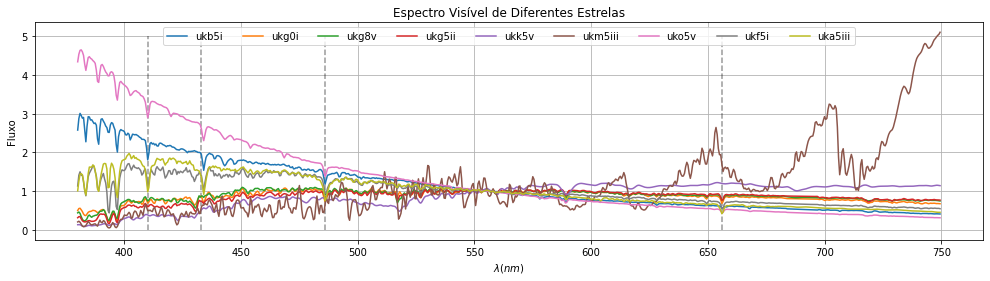

In [27]:
niveis = np.arange(6)
tmp = ((energia(niveis).to(u.eV)-energia(1).to(u.eV))/(const.h*const.c))
lamb = np.floor((1/tmp[tmp !=0]).to(u.nm).value).astype(int)[1:]
ii = np.where(lambda_range == VIOLET)[0][0]
ff= np.where(lambda_range == RED)[0][0]
fig, ax = plt.subplots(1, figsize=(17, 4))
[ax.plot(lambda_range[ii:ff], spec[ii:ff], label = tipos[ind]) for ind, spec in enumerate(data[:])]
ax.vlines(lamb, 0, 5, linestyle = "dashed", alpha = 0.4 )
ax.set_xlabel(r"$\lambda (nm)$")
ax.set_ylabel(r"Fluxo")
plt.title("Espectro Visível de Diferentes Estrelas")
plt.grid()
plt.legend(loc = 'upper center', ncol = 9)
plt.show();

### Exercício:
Faça o gráfico do espectro ao longo de toda a base de dados.
Faça o gráfico do espectro de estrelas com a mema letra na classificação e diferentes classes de luminosidade. Descreva o que você vê.
- A área deste gráfico esta relacionada com qual grandeza física?
- Como poderíamos medir a temperatura da estrela?

A classificação espectral das estrelas é uma classificação por temperatura. Conforme vimos, em acordo com a temperatura teremos emissões de diferentes elementos. Ao longo do tempo foi possível criar um esquema de classificação conhecido como **OBAFGKMLT**, (*Oh Be A Fine Girl; Kiss My Left Toe*). Estas leytr aparecem em uma ordem estranha porque primeiro foram feitas as classificações de espectro e apenas depois foi percebido que esta classificação era um ordenamento de temperatura.

A primeira classificação foi devido a Pickering com a ajuda de sua assistente pessoal Williamina Fleming (~1890). Esta classificação considerava a intensidade das linhas de Balmer, começando por **A**.

Anne J Cannon, também trabalhando com Pickering em Harvard reordenou as estrelas na ordem da temperatura e criou uma subdivisão numérica nas classes espectrais, com os números de 1 a 9, em 1901. 

A realização de que a sequência espectral realmente seguia uma série de temperaturas e quais os seus valores veio bem mais tarde, tendo sido necessário desenvolver o diagrama de Herzprung-Russel e culminando com o trabalho de Cecilia Paine Gaposhkin.

Neste tempo a classificação de estrelas ia apenas até a letra M e o objeto mais frio era um objeto da classe M9, com cerca de 2400K na sua superfície.

Com o advento dos surveys infravermelhos foi possível achar objetos mais frios e terminamos com a classificação indicada acima.

A história da espesctroscopia estelar é bastante interessante, cheia de reviravoltas, descobertas acidentais, descobwertas geniais, interações com áreas que antes pareciam completamente distintas e, muitas vezes, bonitas histórias de superação pessoal ou mesmo de ativismo político e social.

A ordem de grandeza das temperaturas esta indicaad na tabela abaixo:

| Tipo Espectroscópico | T(K) | Característica |
|----------------------|------|----------------|
|**O** | $40.000$ K|Linhas de Hélio neutro e Ionizado. Pouco hidrogênio |
|**B** | $20.000$ K|Hélio neutro. Hidrogênio mais forte. |
|**A** | $9.000$ K| Hidrogênio neutro forte, metais ionizados|
|**F** | $7.000$ K| hidrogênio neutro fraco, mateis ionizados|
|**G** | $5.500$ K| hidrogênio neutro fraco, metais neutros e ionizados|
|**K** | $4.500$ K| Muito pouco hidrogênio, metais neutros|
|**M** | $3.000$ K| pouco hidrogênio, pouco metais neutros, linhas moleculares ($TiO$)|
|**L** | $2.000$ K| Lítio neutro|
|**T** | $< 1.300$ K| metano|

Na década de 30 surgiu mais uma classificação, baseada na classe de luminosidade das estrelas. Ela consistia, do ponto de vista empírico, em observar a largura das linhas de absorção e classificar as estrelas degundo esta largura com números romanos de I a VI. Do ponto de vista físico, a largura das linhas espectrais esta associada com o raio da estrela. Obviamente o raio da estrela esta associado com a sua luminosidade. Dividimos as estrelas em categorias:

| Categoria | Nome |
|-----------|------|
| **I** | Supergigante |
| **II** | Gigante brilhante |
| **III** | Gigante |
| **IV** | Subgigante |
| **IV** | anã (Sequência Principal) |
| **V** | sub-anã|


## Diagramas de Herzprung Russel

In [28]:
# Instruções para usar o artroquery com a base de dados do ESO
#from astroquery.eso import Eso
#eso = Eso()
#eso.login("lbarosi", store_password=True)
#eso.list_instruments()
#eso.query_instrument('isaac', help=True)
#table = eso.query_instrument('isaac', column_filters={"dp_tech":"SPECTRUM"})
#eso.get_headers(table['DP.ID'])
#data_files = eso.retrieve_data(table['DP.ID'][:2])

In [29]:
# Fazendo  download do catálogo Hipparcos Hipparcos
from astroquery.vizier import Vizier
v = Vizier(columns = ["all"])
catalog_list = v.find_catalogs('I/239')
catalogs = v.get_catalogs(catalog_list.keys())
v.ROW_LIMIT = -1
Hipparcos = v.get_catalogs(catalog_list.keys())

In [30]:
# Cortando colunas de interesse
Hipparcos[0].keep_columns(["HIP", "Vmag", "Plx", "B-V", "SpType"])

In [31]:
# Para o pandas. Formato Table é horrível
df = Hipparcos[0].to_pandas()
df["SpType"] = df.SpType.str.decode("utf-8")

In [32]:
# Limpeza
df_clean = df.apply(lambda x: np.nan if isinstance(x, str) and (x.isspace() or not x) else x)
df_clean= df_clean.dropna()

df_clean['Vmag'] = df_clean['Vmag'].astype(np.float)
df_clean['Plx'] = df_clean['Plx'].astype(np.float)
df_clean['B-V'] = df_clean['B-V'].astype(np.float)

In [33]:
# Função Auxiliar retorna cor associada a Lambda_max do corpo negro a temperatura T
def cor(TT):
    LL = BlackBody(temperature= TT*u.K).lambda_max.to(u.nm).value
    if LL < VIOLET:
        LL = VIOLET
    if LL > RED:
        LL = RED
    r, g, b = wv2rgb.wavelength_to_rgb(LL)
    cor = (r/255,g/255,b/255)
    return cor

In [34]:
classeL = {"I":"Subgigante", 
           "II":"Gigante Brilhante", 
           "III":"Gigante", 
           "IV":"Subgigante", 
           "V":"sequência principal", 
           "VI": "sub-anã"}
sizes = {"I":160,"II": 80, "III":20, "IV":10, "V":5, "VI":1}
# Filtrando tipos espectrais
f = lambda s: (len(s) >= 2)  and (s[0].isalpha()) and (s[1].isdigit())
i  = df_clean['SpType'].apply(f)
df_clean = df_clean[i]
# Cria coluna de tipos espectrais sem informação da classe de luminosidade
f = lambda s: s[0:2]
df_clean['SpType2'] = df_clean['SpType'].apply(f)
df_clean.shape
f = lambda s: s[0] in 'OBAFGKM'
df_clean = df_clean[df_clean['SpType'].map(f)]

In [35]:
# Calculando a magnitude absoluta no espectro visivel
df_clean['M_V'] = df_clean['Vmag'] + 5 * np.log10(df_clean['Plx']/100.)
# Calculando a Temperatura
df_clean["Temperatura"] = 4600*(1/(0.92 * df_clean["B-V"] + 1.7) + 1/(0.92*df_clean["B-V"] + 0.62))
df_clean["Luminosidade"] = df_clean.SpType.map(lambda x: x[2:])
df_clean = df_clean[
                (df_clean.Luminosidade != "") & 
                (df_clean.Luminosidade.isin(["I", "II", "III", "IV", "V", "VI"]))]
df_clean["Tipo"] = df_clean["Luminosidade"].map(lambda x: classeL[x])
df_clean["cor"] = df_clean.Temperatura.map(lambda TT: cor(TT))
df_clean["size"] = df_clean.Luminosidade.map(lambda x: sizes[x])

/home/lbarosi/miniconda3/envs/cursos/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lbarosi/miniconda3/envs/cursos/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


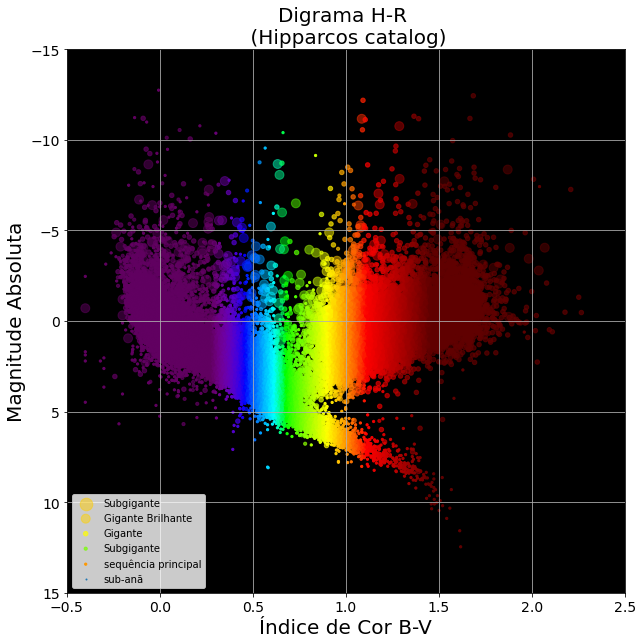

In [36]:
alfas = [0.5, 0.5, 0.7, 0.7, 1.0, 1.0]


fig, ax = plt.subplots(1, figsize=(10, 10))
# Titulos
ax.set_title('Digrama H-R \n (Hipparcos catalog)')
ax.title.set_fontsize(20)
ax.set_xlabel('Índice de Cor B-V')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Magnitude Absoluta')
ax.yaxis.label.set_fontsize(20)
# Plotting
for ii, LL in enumerate(["I", "II", "III", "IV", "V", "VI"]):
    dados = df_clean[df_clean.Luminosidade == LL]
    ax.scatter(dados["B-V"],
               dados["M_V"],
               s = dados["size"],
               c = dados["cor"].tolist(),
               alpha = alfas[ii], 
               label = classeL[LL])

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
ax.set_facecolor("black")
legend = ax.legend()
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(15, -15)
ax.grid()
plt.show();

![IMAGE](../IMAGES/HRDiagram.png)

In [37]:
df_clean.Luminosidade = df_clean.Luminosidade.astype("category")
df_clean.SpType2 = df_clean.SpType2.astype("category")

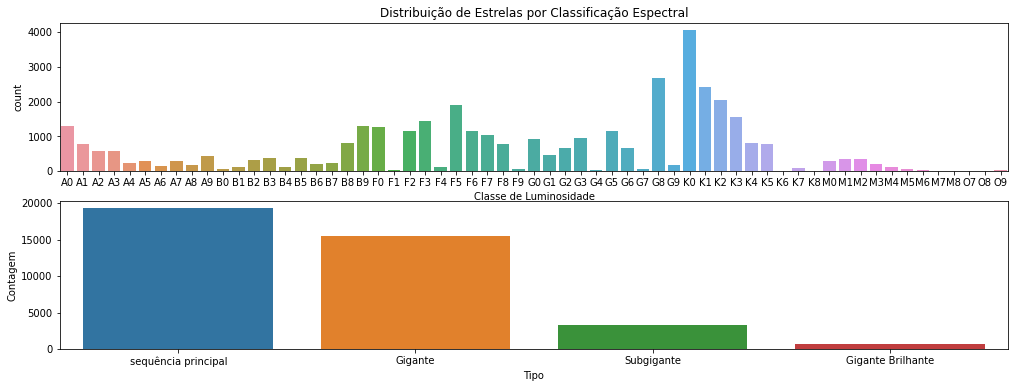

In [38]:
fig, ax = plt.subplots(nrows = 2, figsize=(17, 6))
sns.countplot(df_clean.SpType2, ax = ax[0])
ax[0].set_title("Distribuição de Estrelas por Classificação Espectral")
ax[0].set_xlabel("Tipo Espectral")
ax[1].set_ylabel("Contagem")
sns.countplot(df_clean.Tipo, ax = ax[1])
ax[0].set_xlabel("Classe de Luminosidade")
ax[1].set_ylabel("Contagem")
plt.show();

### Exercícios:
1. Com as relações que obtivemos da aula passada, como varia a massa no diagrama de Herzprung-Russel?
2. Com as relações que obtivemos da aula passada, como varia a massa no diagrama de Herzprung-Russel?
3. Construa um gráfico de HR com o eixo horizontal sendo a temperatura (escala logarítmica)
4. O tempo de vida de uma estrela é proporcional a sua Massa, pois este é o único combustível que a estrela pode usar. Já discutimos uma relação entre massa e luminosidade, que é a taxa em que a estrela queima  combustível. Podemos assim estimar o tempo de vida de uma estrela e ver como é a dependência no diagrama HR, qual é a sua conclusão?